**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from pathlib import Path

In [ ]:
import glob
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

**Read csv file using pandas**

In [ ]:
df = pd.read_csv("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Labels\\Train_DefectType_PrithviAI.csv")
df.rename(columns={"images id": "images_id"}, inplace = True)
df.head()

,images_id,defect_flag
0,000001.png,0
1,000002.png,0
2,000003.png,1
3,000004.png,0
4,000005.png,1


In [ ]:
img = cv2.imread("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\" + "000001.png", cv2.IMREAD_COLOR)

**Preprocessing of data**

In [ ]:
image = []                  # used to store image data
img_label = []              # used to store image label
img_indexes = []            # used to store image name
for i in df["images_id"]:
    if ((Path.cwd() / "C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\" / i).exists() == True):         # check if image exists or not
        img = cv2.imread("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\" + i, cv2.IMREAD_COLOR)       # read image using opencv 
        img = cv2.resize(img, (224,224))                                                                   #resize image 
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        image.append(img)
        img_label.append(df.loc[df["images_id"] == i, "defect_flag"].iloc[0])                             #store label of each image in img_label
        img_indexes.append(i)
    else:
        pass

**Visualize Image**

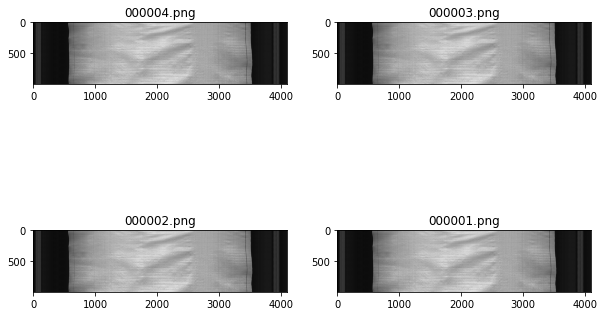

In [ ]:
i = 4
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
for path in glob.glob("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Images\\*"):
    if (i>0):
        img = cv2.imread(img_path)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        p = path.split("\\")[-1]
        plt.title(p)
        i = i-1;

**Total number of image samples**

In [ ]:
len(image), len(img_label), len(img_indexes)

(3267, 3267, 3267)

**Convert list into numpy array**

In [ ]:
train_image = np.array(image)
train_label = np.array(img_label)
train_index = np.array(img_indexes)

In [ ]:
train_image.shape             #there are 3267 images of dimension (224 X 224 x 3)

(3267, 224, 224, 3)

**Split dataset with 80% training data and 20% testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_image, train_label, test_size = 0.2, random_state = 100)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2613, 224, 224, 3), (654, 224, 224, 3), (2613,), (654,))

**Normalize image dataset**

In [ ]:
x_train_scaled = []
for i in range(len(x_train)):
    x_train_scaled.append(x_train[i]/255.0)
    
x_test_scaled = []
for i in range(len(x_test)):
    x_test_scaled.append(x_test[i]/255.0)

In [ ]:
len(x_train_scaled)

2613

**Load MobileNetV2 model**

In [ ]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
feature_extractor, input_shape = (224,224,3), trainable = False)            # fixed weights so that it will not change while training our model

**Add some dense layer and this is the only trainable parameter**

In [ ]:
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 2,422,210
Trainable params: 164,226
Non-trainable params: 2,257,984
_________________________________________________________________


**Used adam optimizer and parseCategoricalCrossentropy loss**

In [ ]:
model.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["acc"]
)

In [ ]:
x_train_scaled = np.array(x_train_scaled)

In [ ]:
y_train1 = np.array(y_train)

In [ ]:
x_test_scaled = np.array(x_test_scaled)
y_test1 = np.array(y_test)

**Fit model with epochs = 50**

In [ ]:
model.fit(x_train_scaled, y_train1, validation_data=(x_test_scaled, y_test),epochs = 50,verbose=2)

Epoch 1/50
82/82 - 95s - loss: 0.6022 - acc: 0.7953 - val_loss: 0.4277 - val_acc: 0.7997
Epoch 2/50
82/82 - 82s - loss: 0.3637 - acc: 0.8469 - val_loss: 0.3844 - val_acc: 0.8486
Epoch 3/50
82/82 - 80s - loss: 0.3587 - acc: 0.8557 - val_loss: 0.4190 - val_acc: 0.8410
Epoch 4/50
82/82 - 82s - loss: 0.3191 - acc: 0.8645 - val_loss: 0.4207 - val_acc: 0.8349
Epoch 5/50
82/82 - 84s - loss: 0.3167 - acc: 0.8699 - val_loss: 0.4316 - val_acc: 0.8318
Epoch 6/50
82/82 - 81s - loss: 0.3335 - acc: 0.8569 - val_loss: 0.4855 - val_acc: 0.8303
Epoch 7/50
82/82 - 82s - loss: 0.3018 - acc: 0.8710 - val_loss: 0.4242 - val_acc: 0.8364
Epoch 8/50
82/82 - 78s - loss: 0.2933 - acc: 0.8764 - val_loss: 0.4612 - val_acc: 0.8333
Epoch 9/50
82/82 - 61s - loss: 0.3090 - acc: 0.8664 - val_loss: 0.3420 - val_acc: 0.8471
Epoch 10/50
82/82 - 65s - loss: 0.3066 - acc: 0.8706 - val_loss: 0.3487 - val_acc: 0.8563
Epoch 11/50
82/82 - 60s - loss: 0.2870 - acc: 0.8760 - val_loss: 0.3560 - val_acc: 0.8517
Epoch 12/50
82/82 -

**Validation accuracy**

In [ ]:
loss , acc = model.evaluate(x_test_scaled, y_test, verbose = 2)
print(acc)

21/21 - 11s - loss: 0.6632 - acc: 0.8287
0.8287461996078491


**Load testing data**

In [ ]:
index1 = []
test_img = []
for img_path in glob.glob("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Testing Images\\*"):             # load images from system
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)                                                      # read image using openCv library
    img = cv2.resize(img, (224, 224))                                                                 # resize image so that it fits in our MobileNetV2 model      
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    iim = img_path.split("\\")[-1]                                                                    # it is used to extract name of image
    test_img.append(img)                                                                              # store image data  
    index1.append(iim)                                                                                # store image name (which is extracted above)

In [ ]:
len(test_img), len(index1)        #total number of testing data

(1099, 1099)

Convert into numpy array

In [ ]:
index_arr = np.array(index1)
test_image = np.array(test_img)

In [ ]:
test_image.shape, index_arr.shape               # shape of image = (224 X 224 X 3)

((1099, 224, 224, 3), (1099,))

In [ ]:
test_image = test_image/255.0                # normalize the image data

In [ ]:
test_image.shape

(1099, 224, 224, 3)

**Visualize testing data**

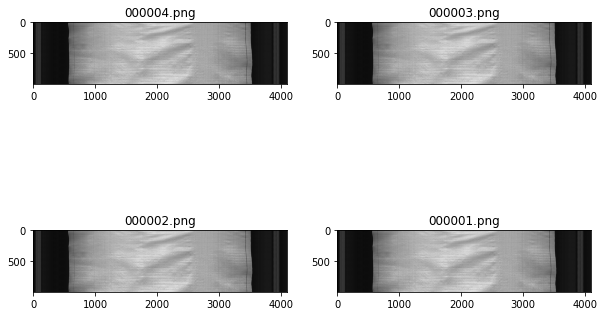

In [ ]:
i = 4
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
for path in glob.glob("C:\\Users\\Satyam Kumar\\Downloads\\Data\\Testing Images\\*"):
    if (i>0):
        img = cv2.imread(img_path)
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        p = path.split("\\")[-1]
        plt.title(p)
        i = i-1;

In [ ]:
y_predict = model.predict(test_image)                     # predict the label on testing data

In [ ]:
y_predict.shape

(1099, 2)

In [ ]:
y_p = np.argmax(y_predict, axis = 1)                      # argmax is used to make maximum value equal to 1 and minimum value equal to 0

In [ ]:
y_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
len(y_p)

1099

In [ ]:
df1 = pd.DataFrame(index_arr)                                # convert array into dataframe

In [ ]:
df1.rename(columns = {0 : 'images id'}, inplace = True)        # rename column name of dataframe

In [ ]:
df2 = pd.DataFrame(y_p)

In [ ]:
df2.rename(columns = {0 : 'defect_flag'}, inplace = True)

In [ ]:
dff = pd.concat([df1, df2],  axis = 1)                        # concat above two dataframe

In [ ]:
dff.head()

,images id,defect_flag
0,000001.png,0
1,000002.png,0
2,000003.png,0
3,000004.png,0
4,000005.png,1


In [ ]:
dff.loc[dff["images id"] == "000005.png", "defect_flag"].iloc[0]          # access the value of defect_flag of image "000005.png"

1

**Visualize good images**

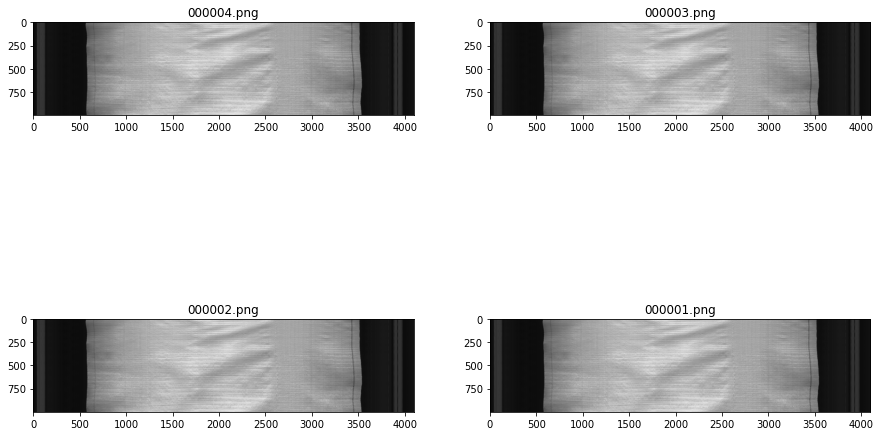

In [ ]:
i = 4
fig = plt.figure(figsize=(15, 10))             # it is used to make subplot
rows = 2 
columns = 2
for j in dff["images id"]:
    if (dff.loc[dff["images id"] == j, "defect_flag"].iloc[0] == 0):         # extract all good image
        if (i>0):
            img = cv2.imread(img_path)
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
            plt.title(j)
            i = i-1;

**Visualize bad image**

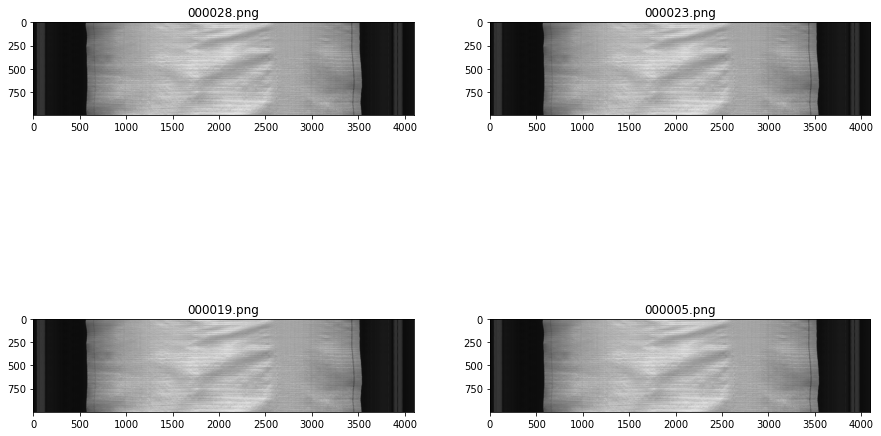

In [ ]:
i = 4
fig = plt.figure(figsize=(15, 10))
rows = 2
columns = 2
for j in dff["images id"]:
    if (dff.loc[dff["images id"] == j, "defect_flag"].iloc[0] == 1):       #check image is bad or not (if bad then only proceed furthur)
        if (i>0):
            img = cv2.imread(img_path)
            fig.add_subplot(rows, columns, i)
            plt.imshow(img)
            plt.title(j)
            i = i-1;

In [ ]:
dff.to_csv('Final_DefectType_Knight_Riders.csv', index = False)              # make csv